<a href="https://www.kaggle.com/code/sootooly/aviation-accidents?scriptVersionId=130306571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/aviation-accidents-aviation-safety-network-dataset/aviation-accident-data-2023-05-16.csv'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(file_path, parse_dates=True).dropna()
df = df.loc[(df.date != 'date unk.') & (df.year != 'unknown')]
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


# Accidents by year

<AxesSubplot: title={'center': 'Aviation Accidents'}, xlabel='Year', ylabel='Count'>

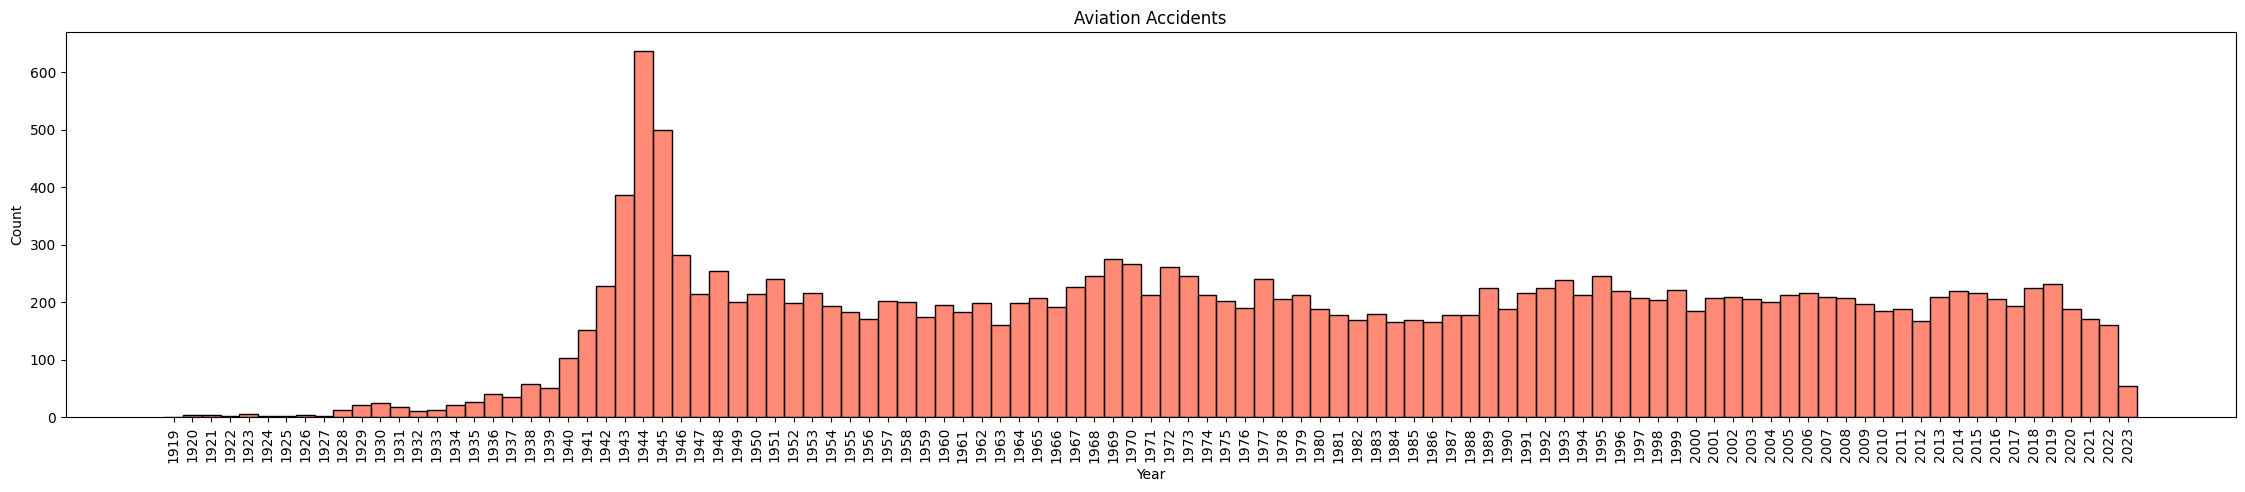

In [77]:
plt.figure(figsize=(28, 5))
plt.xticks(rotation=90)
plt.title('Aviation Accidents')
plt.ylabel('Count')
plt.xlabel('Year')
count_year = df.groupby('year').year.count()
sns.histplot(x=df.year, color='tomato')

# Fatalities by year

Text(0.5, 0, 'Year')

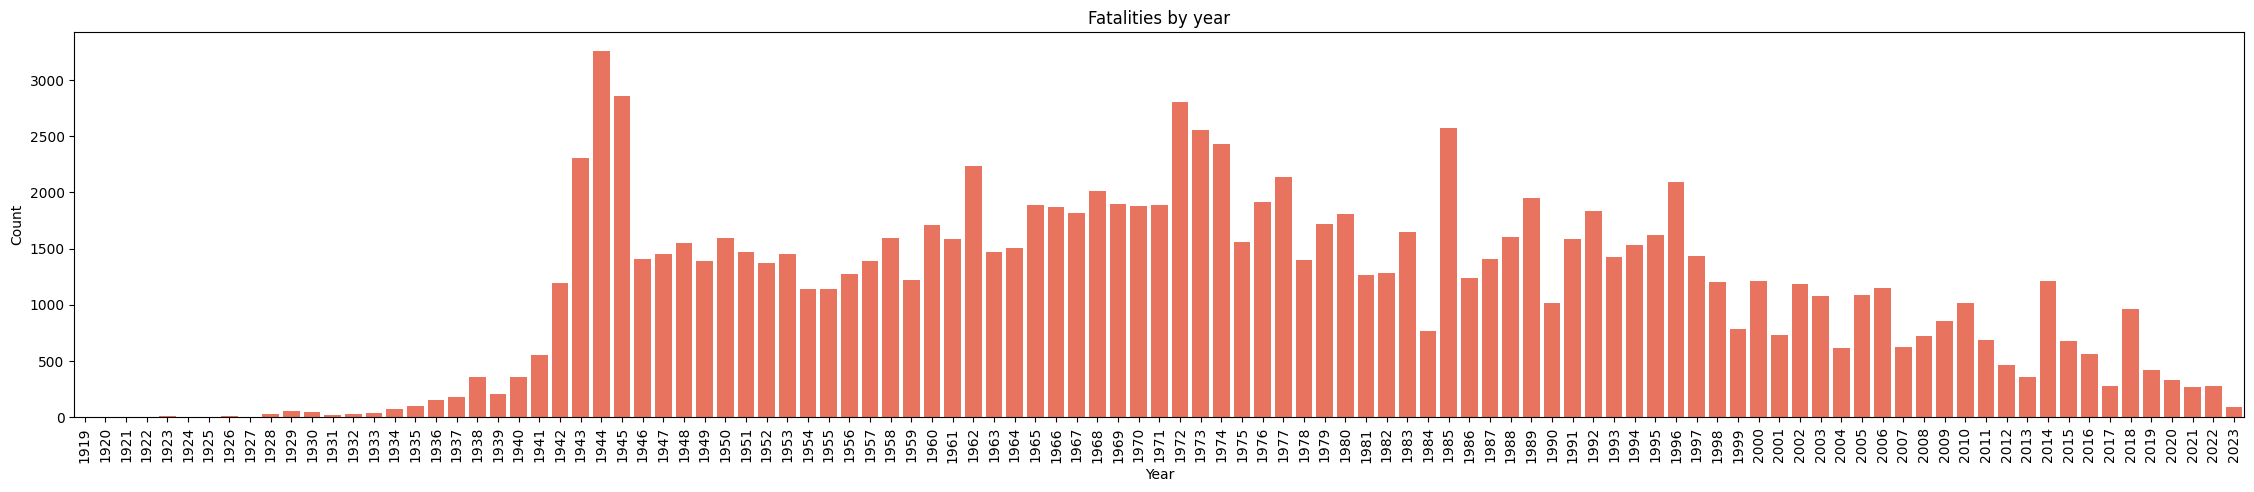

In [76]:
def check_fatal(value):
    if '+' in str(value):
        return False
    else:
        return True

df = df.loc[df['fatalities'].map(check_fatal)]
df['fatalities'] = df['fatalities'].astype('int64')
fatal_year = df.groupby('year').fatalities.sum()

plt.figure(figsize=(28, 5))
plt.xticks(rotation=90)

sns.barplot(x=fatal_year.index, y=fatal_year, color='tomato')

plt.title('Fatalities by year')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 1.0, 'Aviation Accidents by country (1919-2023)')

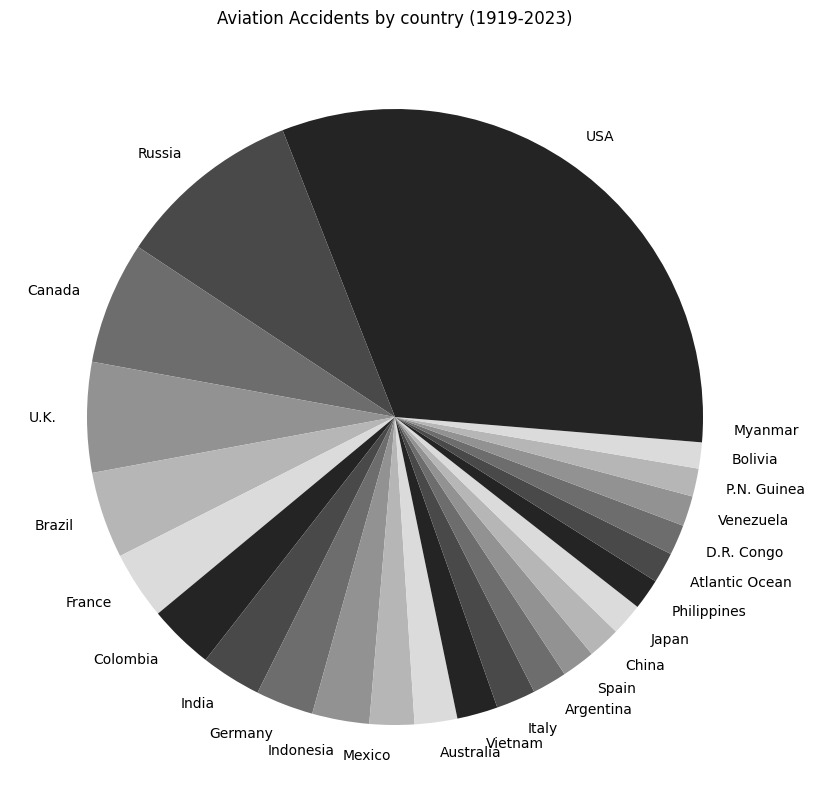

In [78]:
count_country = df.groupby('country')['country'].count().sort_values(ascending=False)[:25]

plt.figure(figsize=(10, 10))
plt.pie(x=count_country, labels=count_country.index, colors=sns.color_palette('gray'))
plt.title('Aviation Accidents by country (1919-2023)')

# Boeing accidents

In [41]:
def check_boeing(row):
    if 'boeing' in str(row.type).lower():
        return True
    else:
        return False
df.loc[df.apply(check_boeing, axis='columns')]['type'].value_counts()[:15]

Boeing KC-135A                   51
Boeing 737-2A8                   18
Boeing 707-321C                  17
Boeing 737-8AS (WL)              15
Boeing KC-97G Stratofreighter    15
Boeing 377 Stratocruiser         12
Boeing 707-321B                  12
Boeing 737-4Y0                   12
Boeing B-17G                     10
Boeing 707-323C                  10
Boeing 737-4Q8                    9
Boeing 737-823 (WL)               9
Boeing 720-023B                   9
Boeing 737-7H4 (WL)               8
Boeing 747-121                    8
Name: type, dtype: int64

# Fatalities / Accident ratio

Text(0, 0.5, '')

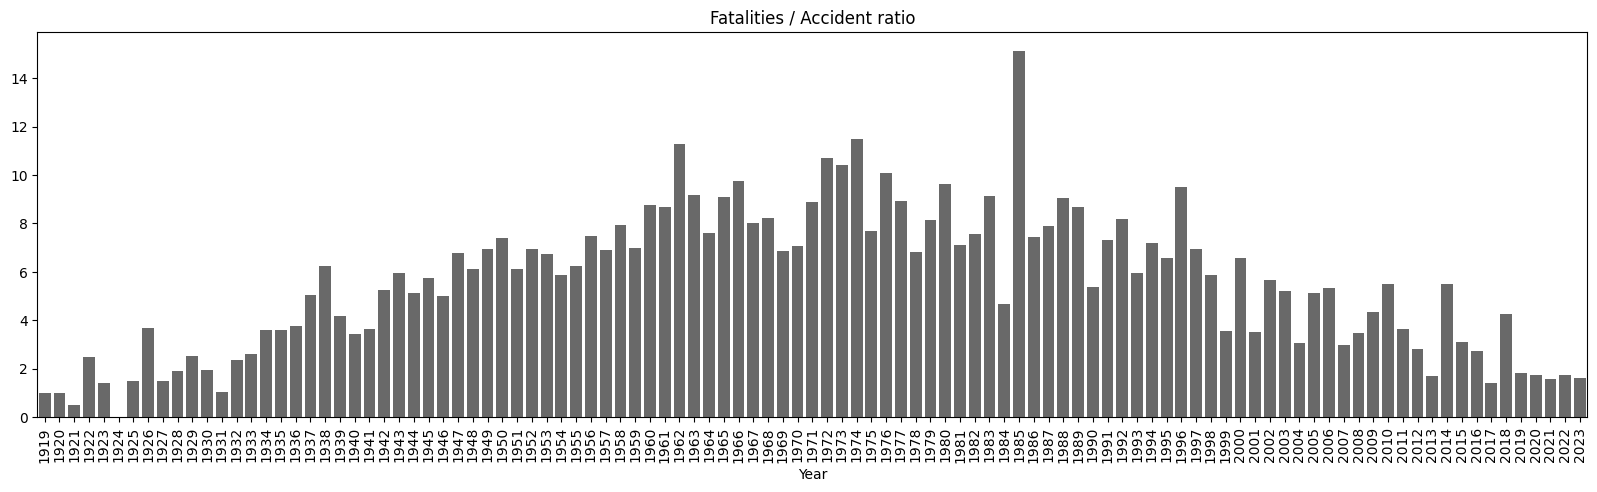

In [75]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)

fatalities_per_accident = df.groupby('year').fatalities.sum() / df.groupby('year').fatalities.count()
sns.barplot(x=fatalities_per_accident.index, y=fatalities_per_accident, color='dimgray')

plt.title('Fatalities / Accident ratio')
plt.xlabel('Year')
plt.ylabel('')

In [62]:
df.loc[df.year == '1985']

,date,type,registration,operator,fatalities,location,country,cat,year
15345,01-JAN-1985,Boeing 727-225,N819EA,Eastern Air Lines,29,Nevado Illimani,Bolivia,A1,1985
15346,04-JAN-1985,Boeing 727-235,N4746,Pan Am,0,Cleveland-Hopkin...,USA,H2,1985
15347,08-JAN-1985,DHC-6 Twin Otter 300,YA-GAY,Bakhtar Afghan,0,Bamyan,Afghanistan,A1,1985
15348,08-JAN-1985,Fokker F-27 Friendship 200MAR,10665,Thai Navy,0,Bangkok Internat...,Thailand,A1,1985
15349,09-JAN-1985,Lockheed L-188AF Electra,N357Q,TPI,3,near Kansas City Down...,USA,A1,1985
...,...,...,...,...,...,...,...,...,...
15550,15-DEC-1985,Boeing 747-136,G-AWNE,British Airways,0,Boston-Logan Int...,USA,A2,1985
15554,26-DEC-1985,Antonov An-26RT,22,Soviet AF,1,near Kabul Airport (KBL),Afghanistan,A1,1985
15556,30-DEC-1985,Shorts SC.7 Skyvan 3-100,RAN-23,Nepal Army,25,near Dhangadhi,Nepal,A1,1985
15557,31-DEC-1985,BAe-125-700B,5N-AXP,Nigerian Government,7,near Kaduna,Nigeria,A1,1985
